<a href="https://colab.research.google.com/github/y2o2u2n/boostcourse-dl-tensorflow/blob/master/05_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()
tf.set_random_seed(777)  # for reproducibility
print(tf.__version__)

1.13.1


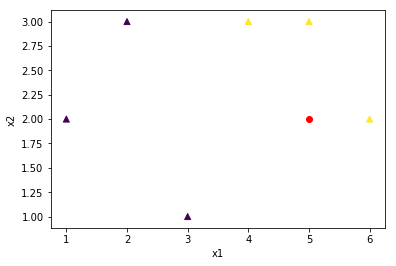

In [7]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()


In [0]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [0]:
def logistic_regression(features):
    hypothesis  = tf.div(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis


In [0]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.log(logistic_regression(features)) + (1 - labels) * tf.log(1 - hypothesis))
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)


In [0]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy


In [0]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])


In [14]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in tfe.Iterator(dataset):
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000
